In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set(style="darkgrid")
plt.rcParams['figure.figsize']=[10,10]
%load_ext line_profiler

In [6]:
def gradient_descent(step_size,X,y,B,eps=1,debug=True):
    assert X.shape[1]==B.shape[0], "X and B don't have compatible shapes"
    assert X.shape[0]==y.shape[0], "X and y don't have compatible shapes"
    
    change = np.inf
    i=0
    
    while True:
        residual = y-X.dot(B)
        change = X.T.dot(residual)
        B = B + step_size*change
        change_norm = np.linalg.norm(change)
        i=i+1
        if i%100==0 and debug:
            print(f"Step {i} has change value {change_norm}")
        if abs(change_norm)==np.inf:
            print("Did not converge. Try reducing step_size")
            break
        if abs(change_norm)<eps:
            print(f"Converged in {i} steps. Final change value : {change_norm}")
            break
        
    return B,change_norm

In [7]:
n = 10000
p = 100
n_sims = 20

In [12]:
def run_sim():
    X = np.random.normal(size=n*p).reshape(-1,p)
    beta_truth = np.random.uniform(-2,2,size=p)
    f_truth = X.dot(beta_truth)
    y = f_truth + np.random.normal(scale=2,size=n)

    B_gd,change=gradient_descent(1e-6,X,y,beta_truth,debug=False)
    model = LinearRegression().fit(X,y)
    B_lm = model.coef_
    error = np.linalg.norm(B_lm-B_gd)
    print(f"Error is {error}\n")
    return error

In [13]:
%lprun -f run_sim run_sim()

Converged in 795 steps. Final change value : 0.9979008040274128
Error is 0.0034144712227587542



Timer unit: 1e-06 s

Total time: 0.462631 s
File: <ipython-input-12-b6e769c100ac>
Function: run_sim at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def run_sim():
     2         1      43809.0  43809.0      9.5      X = np.random.normal(size=n*p).reshape(-1,p)
     3         1         30.0     30.0      0.0      beta_truth = np.random.uniform(-2,2,size=p)
     4         1        551.0    551.0      0.1      f_truth = X.dot(beta_truth)
     5         1        609.0    609.0      0.1      y = f_truth + np.random.normal(scale=2,size=n)
     6                                           
     7         1     397288.0 397288.0     85.9      B_gd,change=gradient_descent(1e-6,X,y,beta_truth,debug=False)
     8         1      20201.0  20201.0      4.4      model = LinearRegression().fit(X,y)
     9         1          2.0      2.0      0.0      B_lm = model.coef_
    10         1         37.0     37.0      0.0      error =

In [14]:
errors = [run_sim() for _ in range(n_sims)]

Converged in 827 steps. Final change value : 0.999626342442826
Error is 0.0017638098430909955

Converged in 807 steps. Final change value : 0.9930500183435625
Error is 0.0006178862895220361

Converged in 787 steps. Final change value : 0.994001017213568
Error is 0.0037149079834605

Converged in 796 steps. Final change value : 0.9999178283107595
Error is 0.0005709656874164294

Converged in 797 steps. Final change value : 0.9994109000647395
Error is 0.00239294459827885

Converged in 802 steps. Final change value : 0.9979803528854632
Error is 0.0015254758516703645

Converged in 802 steps. Final change value : 0.9957827836305958
Error is 0.0025331386802617158

Converged in 806 steps. Final change value : 0.9994031009221687
Error is 0.0016489363004375988

Converged in 760 steps. Final change value : 0.9994051326615789
Error is 0.004164043426288686

Converged in 788 steps. Final change value : 0.9979738744680005
Error is 0.00043305070930234335

Converged in 814 steps. Final change value : 0.

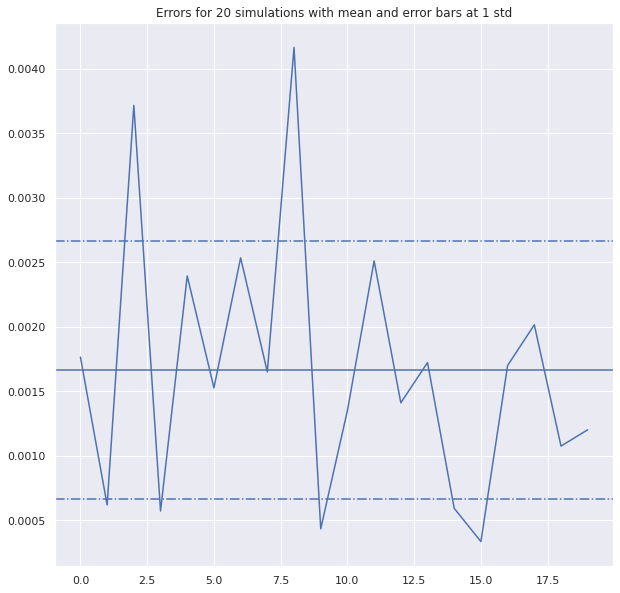

In [25]:
ax=sns.lineplot(range(n_sims),errors);
ax.axhline(np.mean(errors), ls='solid')
ax.axhline(np.mean(errors)+np.std(errors), ls='-.')
ax.axhline(np.mean(errors)-np.std(errors), ls='-.')
plt.title(f'Errors for {n_sims} simulations with mean and error bars at 1 std');